### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [650]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [41]:
data = pd.read_csv('data/coupons.csv')

In [42]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

#### I first wanted to run through both the object and numeric dtype columns, looking for any anomalies. I found that numerics were in good order but the objects contained NaN values. Additonally, I think it best to replace the tilde(~) with a dash(-) where applicable. I also picked up on a column misspelling.

In [59]:
#Numeric columns
for column in (data.columns):
    if column in data.select_dtypes(include=['int']): 
        print(data[column].value_counts())

80    6528
55    3840
30    2316
Name: temperature, dtype: int64
0    7431
1    5253
Name: has_children, dtype: int64
1    12684
Name: toCoupon_GEQ5min, dtype: int64
1    7122
0    5562
Name: toCoupon_GEQ15min, dtype: int64
0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64
0    9960
1    2724
Name: direction_same, dtype: int64
1    9960
0    2724
Name: direction_opp, dtype: int64
1    7210
0    5474
Name: Y, dtype: int64


In [64]:
#Non-numeric columns
for column in (data.columns):
    if column in data.select_dtypes(exclude=['int']): 
        print(data[column].value_counts(dropna=False))

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64
Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64
1d    7091
2h    5593
Name: expiration, dtype: int64
Female    6511
Male      6173
Name: gender, dtype: int64
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64
Some college - no degree    

3. Decide what to do about your missing data -- drop, replace, other...

#### I get distracted by misspellings and wanted this fixed first. Next, not wanting NaN values in my dataset while also not wanting to disregard those survey responses, I decided to make an assumption that the lack of a response (NaN) would have been the participant saying never. Last, I updated the tilde(~) with a dash(-).

In [65]:
#Rename column
data.rename(columns={'passanger': 'passenger'}, inplace = True)

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
#Replace NaN
for column in (data.columns[data.isna().any()].tolist()):
    print(data[column].value_counts(dropna=False))

data.fillna("never", inplace = True)

NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: car, dtype: int64
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: Bar, dtype: int64
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: CoffeeHouse, dtype: int64
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: CarryAway, dtype: int64
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: RestaurantLessThan20, dtype: int64
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: Restaurant20To50, dtype: int64


In [68]:
#Confirming changes
data.columns[data.isna().any()].tolist()

[]

In [79]:
#Replacing all ~
for column in (data.columns):
    if column in data.select_dtypes(exclude=['int']): # I learned here that if int is not excluded, an error is thrown when attempting to call .str
        data[column] = data[column].str.replace('~', '-')

#### I also found it neccessary to adjust the age values

In [402]:
data['age'].value_counts()
data['age'].replace({'below21': '20below','21': '21-25', '26': '26-30', '31': '31-35', '36': '36-40', '41': '41-45', '46': '46-50', '50plus': '51plus'}, inplace=True)

21-25      2653
26-30      2559
31-35      2039
51plus     1788
36-40      1319
41-45      1093
46-50       686
20below     547
Name: age, dtype: int64

#### Finally, I found it best that I update the Y column name to something I could easily recognize as I work through the data.

In [403]:
# Rename column
data.rename(columns={'Y': 'Accepted'}, inplace = True)

<Axes: >

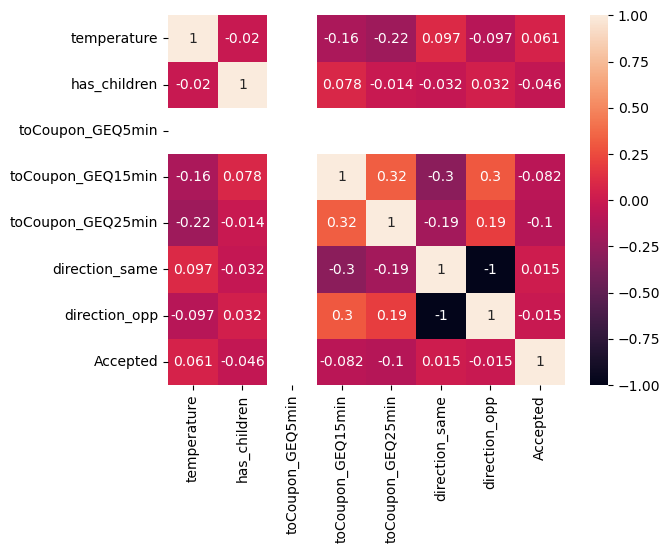

In [404]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

4. What proportion of the total observations chose to accept the coupon? 



#### 56.8% of participants chose to accept the coupon

In [405]:
#Assigned variables for percentages
yes_avg = str((data["Accepted"].value_counts(normalize=True)[1]*100).round(1)) #56.8
no_avg = str((data["Accepted"].value_counts(normalize=True)[0]*100).round(1)) #43.2

(array([0, 1]), [Text(0, 0, 'Yes (56.8)'), Text(1, 0, 'No (43.2)')])

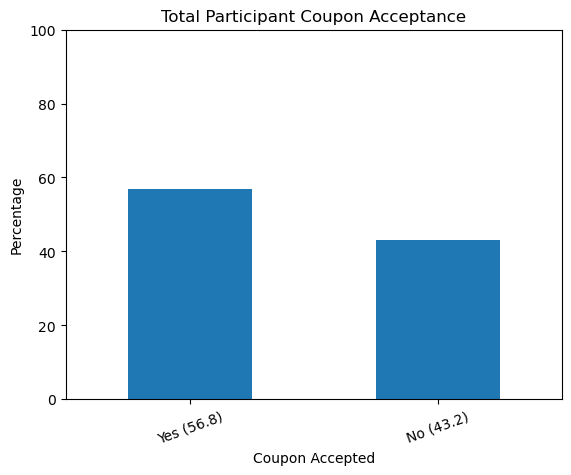

In [406]:
#Bar chart comparing our coupon acceptance
y_bar = (data["Accepted"].value_counts(normalize=True)*100).plot(kind='bar', ylim=(0,100), 
         title='Total Participant Coupon Acceptance')
y_bar.set_xlabel("Coupon Accepted")
y_bar.set_ylabel("Percentage")
y_bar.set_xticklabels(('Yes (' + yes_avg + ')', 'No (' + no_avg + ')'))
plt.xticks(rotation=20)

5. Use a bar plot to visualize the `coupon` column.

#### I first tried a simple Plotly bar but found it boring. I added in coupon acceptance for a multi bar.

In [407]:
px.bar(data, x='coupon', title="Total Coupons by Type", labels={'coupon': 'Coupon', 'count':'Total'})

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry Out'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant > 20'),
  Text(4, 0, 'Restaurant < 20')])

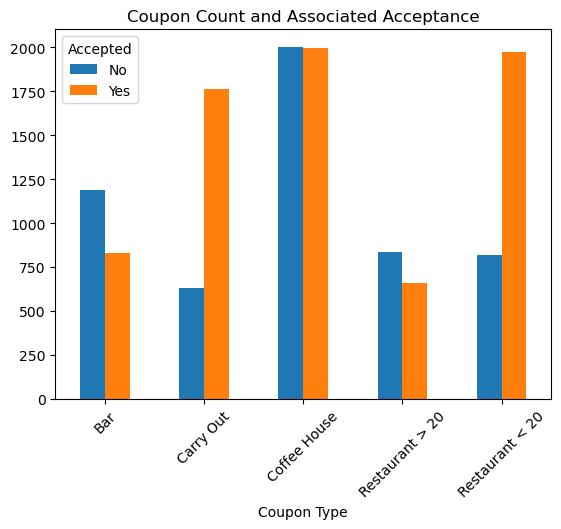

In [408]:
coupon_bar = data.groupby(['coupon','Accepted']).size().unstack().plot(kind='bar', title='Coupon Count and Associated Acceptance')
coupon_bar.set_xlabel("Coupon Type")
coupon_bar.legend(["No", "Yes"], title='Accepted')
coupon_bar.set_xticklabels(('Bar', 'Carry Out', 'Coffee House', 'Restaurant > 20', 'Restaurant < 20'))
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

#### The temperature histogram shows what one would expect. On snowy days, the temperature was at it lowest while the hottest days were all sunny.

In [915]:
temp_hist = px.histogram(data, x= 'temperature', histnorm='probability density', color="weather", nbins=5,
                 labels={
                     "weather": "Weather",
                     "temperature": "Temperature"
                 })
temp_hist.update_layout(bargap=0.2)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [410]:
bar_df = data[(data["coupon"].str.contains("Bar"))]
#bar_df.info()

<Axes: >

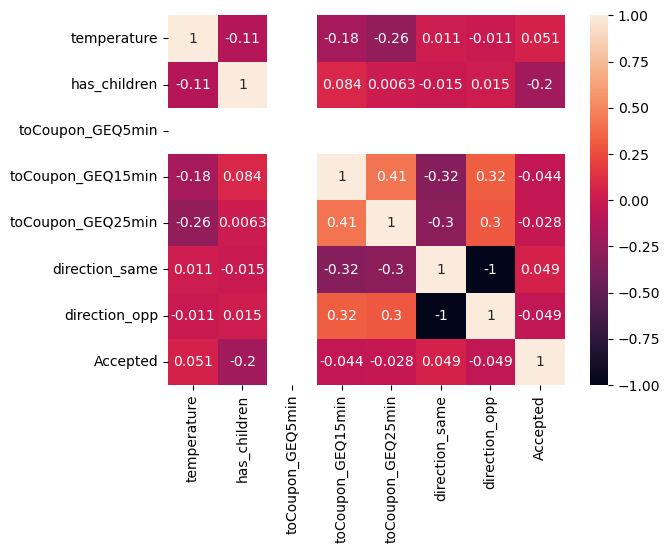

In [411]:
sns.heatmap(bar_df.corr(numeric_only=True), annot=True)

2. What proportion of bar coupons were accepted?


#### Using the same bar chart method from earlier, I charted the total bar coupon accepted with Ploty

In [412]:
#Assigned variables for percentages
bar_yes_avg = str((bar_df["Accepted"].value_counts(normalize=True)[1]*100).round(1)) #41.0
bar_no_avg = str((bar_df["Accepted"].value_counts(normalize=True)[0]*100).round(1)) #59.0

In [413]:
bar_barchart = px.bar((bar_df["Accepted"].value_counts(normalize=True)*100), title='Total Bar Coupon Acceptance')
bar_barchart.update_layout(xaxis_title='Bar Coupon Accepted', yaxis_title='Percentage', showlegend=False,
                  xaxis = dict(
                    tickmode = 'array',
                    tickvals = [0, 1],
                    ticktext = ['No (' + bar_no_avg + ')', 'Yes (' + bar_yes_avg + ')']
                    ),
                   font=dict(size=18, color="black"))

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


#### 77% of people going to bars 3 or more times accepted the coupons while drivers with less visits only accepted coupons 37%.

In [696]:
bar_df['Bar Hopper'] = np.where(bar_df['Bar'].str.contains('4-8|gt8'), True, False)
bar_df['Bar Hopper'].value_counts()
bar_df[bar_df['Bar Hopper']==True]['Accepted'].mean()
bar_df[bar_df['Bar Hopper']==False]['Accepted'].mean()

0.37073707370737075

In [941]:
Bar_Hopper_hist = px.histogram(bar_df, x='Accepted', color='Bar Hopper', histfunc='count', histnorm='percent', barmode='group',
                 labels={
                     "Bar Hopper": "Frequent Bar Goer",
                     "Accepted": "Accepted Coupon"
                 },
                title="Coupon acceptance rates among both drivers that frequent bars 3 or more times and those that do not")
Bar_Hopper_hist.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['', '']
    )
)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


#### I found that there is a distinguishable difference between the two. The acceptance rate percentage for drivers who frequent the bar at least once per month, 25 and older is 64% while all others is 38%. 

In [697]:
bar_df['Bar Casual 25plus'] = np.where((bar_df['Bar'].str.contains('1-3|4-8|gt8')) & (bar_df['age'].str.contains('25-30|31-35|36-40|41-45|46-50|51plus')), True, False)
bar_df['Bar Casual 25plus'].value_counts()
bar_df[bar_df['Bar Casual 25plus']==True]['Accepted'].value_counts()
bar_df[bar_df['Bar Casual 25plus']==True]['Accepted'].mean()
bar_df[bar_df['Bar Casual 25plus']==False]['Accepted'].mean()

0.37712344280860705

In [942]:
Bar_Casual_25plus_hist = px.histogram(bar_df, x='Accepted', color='Bar Casual 25plus', histfunc='count', histnorm='percent', barmode='group',
                 labels={
                     "Bar Casual 25plus": "",
                     "Accepted": "Accepted Coupon"
                 },
                title="Coupon acceptance among both drivers 25 and older that <br>frequent bars 1 or more times and those that do not")
Bar_Casual_25plus_hist.update_layout(title_x=0.5,
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['', '']
    )
)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


#### 60% of these drivers accepted the coupon while of the remaining drivers, 40% accepted.

In [501]:
#drivers who go to bars more than once a month
bar_df['Bar'].value_counts()
bar_df['Bar'].str.contains('1-3|4-8|gt8')

#passengers that were not a kid
bar_df['passenger'].value_counts()
bar_df['passenger'].str.contains('Friends(s)|Partner')

#occupations other than farming, fishing, or forestry
bar_df['occupation'].value_counts()
~bar_df['occupation'].str.contains('Farming Fishing & Forestry')

9        True
13       True
17       True
24       True
35       True
         ... 
12663    True
12664    True
12667    True
12670    True
12682    True
Name: occupation, Length: 2017, dtype: bool

In [699]:
bar_df['Bar_Casual_noKid_noFarm'] = np.where((bar_df['Bar'].str.contains('1-3|4-8|gt8')) & (bar_df['passenger'].str.contains('Friends(s)|Partner')) & (~bar_df['occupation'].str.contains('Farming Fishing & Forestry'))), True, False)

bar_df[bar_df['Bar_Casual_noKid_noFarm']==True]['Accepted'].mean()
bar_df[bar_df['Bar_Casual_noKid_noFarm']==False]['Accepted'].mean()

0.40267765190525234

In [943]:
Casual_Nokid_Nofarm_hist = px.histogram(bar_df, x='Accepted', color='Bar_Casual_noKid_noFarm', histfunc='count', histnorm='percent', barmode='group',
                 labels={
                     "Bar_Casual_noKid_noFarm": "",
                     "Accepted": "Accepted Coupon"
                 },
                title="Coupon acceptance rates among both drivers with passengers(excluding children), that do not <br>work in farming, fishing, or forestry, that frequent bars 1 or more times and those that do not")
Casual_Nokid_Nofarm_hist.update_layout(title_x=0.5,
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['', '']
    )
)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [735]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar_df['Casual_noKid_noWidow'] = np.where((bar_df['Bar'].str.contains('1-3|4-8|gt8')) & (bar_df['passenger'].str.contains('Friends(s)|Partner')) & (~bar_df['occupation'].str.contains('Widowed')), True, False)
bar_df['Casual_noKid_noWidow'].value_counts()
bar_df[bar_df['Casual_noKid_noWidow']==True]['Accepted'].mean() #60
bar_df[bar_df['Casual_noKid_noWidow']==False]['Accepted'].mean() #40

#go to bars more than once a month and are under the age of 30
bar_df['Casual_30under'] = np.where((bar_df['Bar'].str.contains('1-3|4-8|gt8')) & (bar_df['age'].str.contains('20below|21-25|26-30')), True, False)
bar_df['Casual_30under'].value_counts()
bar_df[bar_df['Casual_30under']==True]['Accepted'].mean() #72
bar_df[bar_df['Casual_30under']==False]['Accepted'].mean() #35

#go to cheap restaurants more than 4 times a month and income is less than 50K
bar_df['CheapRest4x_incomeLess50k'] = np.where((bar_df['RestaurantLessThan20'].str.contains('4-8|gt8')) & (bar_df['income'].str.contains('Less than \$12500|\$12500 - \$24999|\$25000 - \$37499|\$37500 - \$49999')), True, False)
bar_df['CheapRest4x_incomeLess50k'].value_counts()
bar_df[bar_df['CheapRest4x_incomeLess50k']==True]['Accepted'].mean() #45
bar_df[bar_df['CheapRest4x_incomeLess50k']==False]['Accepted'].mean() #40

0.6

0
1


[Text(0.5, 0, 'Attends cheap restaurants more than 4 times \na month with income less than 50K'),
 Text(0, 0.5, 'Percentage Accepted'),
 [Text(0, 0, 'Condition Not Met'), Text(1, 0, 'Condition Met')],
 Text(0.5, 1.0, '')]

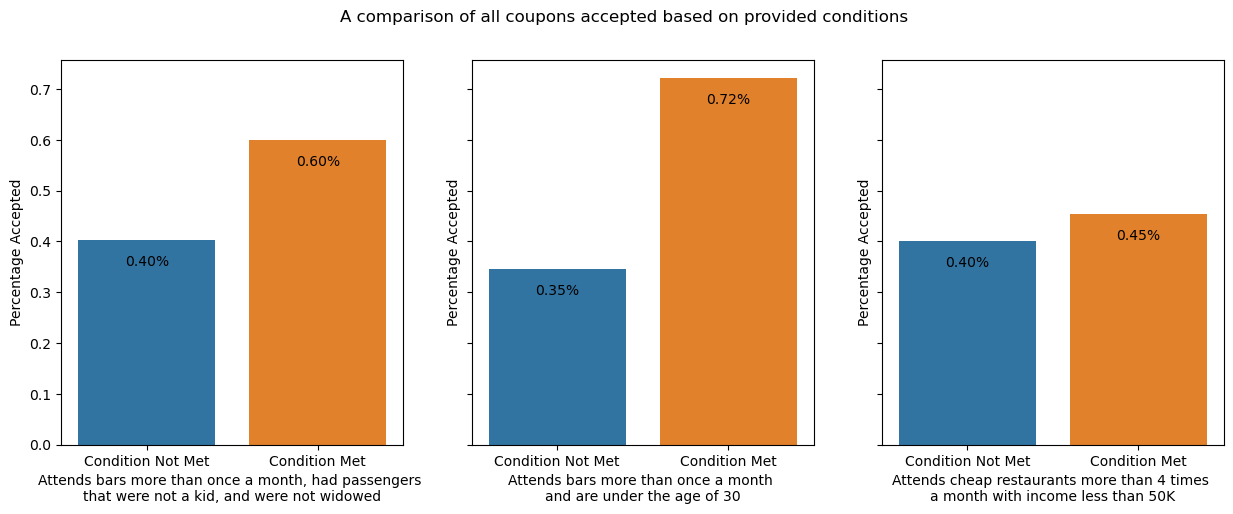

In [778]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('A comparison of all coupons accepted based on provided conditions')

# Casual_noKid_noWidow BarChart
noKid_noWid_bar = sns.barplot(bar_df, ax=axes[0], x='Casual_noKid_noWidow', y='Accepted', errorbar=None)
percentageA = [bar_df[bar_df['Casual_noKid_noWidow']==False]['Accepted'].mean(), bar_df[bar_df['Casual_noKid_noWidow']==True]['Accepted'].mean()]
patchesA = noKid_noWid_bar.patches
for i in range(len(patchesA)):
   print(i) 
   x = patchesA[i].get_x() + patchesA[i].get_width()/2
   y = patchesA[i].get_height()-.05
   noKid_noWid_bar.annotate('{:.2f}%'.format(percentageA[i]), (x, y), ha='center')
axes[0].set(xlabel='Attends bars more than once a month, had passengers \nthat were not a kid, and were not widowed',
       ylabel='Percentage Accepted',
       xticklabels=['Condition Not Met','Condition Met'],
       title='')

# Casual_30under BarChart
under30_bar = sns.barplot(bar_df, ax=axes[1], x='Casual_30under', y='Accepted', errorbar=None)
percentageB = [bar_df[bar_df['Casual_30under']==False]['Accepted'].mean(), bar_df[bar_df['Casual_30under']==True]['Accepted'].mean()]
patchesB = under30_bar.patches
for n in range(len(patchesB)):
   x = patchesB[n].get_x() + patchesB[n].get_width()/2
   y = patchesB[n].get_height()-.05
   under30_bar.annotate('{:.2f}%'.format(percentageB[n]), (x, y), ha='center')
axes[1].set(xlabel='Attends bars more than once a month \nand are under the age of 30',
       ylabel='Percentage Accepted',
       xticklabels=['Condition Not Met','Condition Met'],
       title='')

# CheapRest4x_incomeLess50k BarChart
rest4x_50k_bar = sns.barplot(bar_df, ax=axes[2], x='CheapRest4x_incomeLess50k', y='Accepted', errorbar=None)
percentageC = [bar_df[bar_df['CheapRest4x_incomeLess50k']==False]['Accepted'].mean(), bar_df[bar_df['CheapRest4x_incomeLess50k']==True]['Accepted'].mean()]
patchesC = rest4x_50k_bar.patches
for k in range(len(patchesC)):
   x = patchesC[k].get_x() + patchesC[k].get_width()/2
   y = patchesC[k].get_height()-.05
   rest4x_50k_bar.annotate('{:.2f}%'.format(percentageC[k]), (x, y), ha='center')
axes[2].set(xlabel='Attends cheap restaurants more than 4 times \na month with income less than 50K',
       ylabel='Percentage Accepted',
       xticklabels=['Condition Not Met','Condition Met'],
       title='')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Most drivers are under the age of 30 and are frequent bar goers.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### I plan to dig into the CoffeeHouse coupon

In [782]:
data['coupon'].value_counts()
coffee_df = data[(data["coupon"].str.contains("Coffee House"))]
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passenger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  car                   3996 non-null   object
 15  Bar                   3996 non-null  

<Axes: >

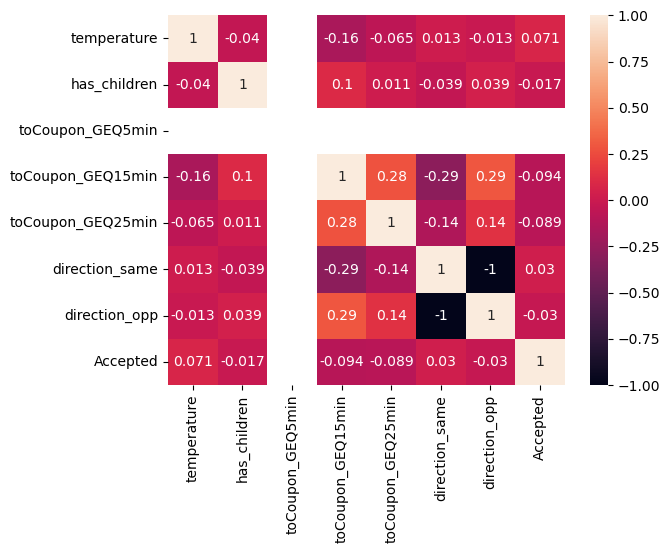

In [783]:
sns.heatmap(coffee_df.corr(numeric_only=True), annot=True)

#### Coupon acceptance was evenly split.

In [787]:
#Assigned variables for percentages
coffee_yes_avg = str((coffee_df["Accepted"].value_counts(normalize=True)[1]*100).round(1)) #49.9
coffee_no_avg = str((coffee_df["Accepted"].value_counts(normalize=True)[0]*100).round(1)) #50.1

50.1


In [788]:
coffee_barchart = px.bar((coffee_df["Accepted"].value_counts(normalize=True)*100), title='Total Coffee Coupon Acceptance')
coffee_barchart.update_layout(xaxis_title='Coffee Coupon Accepted', yaxis_title='Percentage', showlegend=False,
                  xaxis = dict(
                    tickmode = 'array',
                    tickvals = [0, 1],
                    ticktext = ['No (' + coffee_no_avg + ')', 'Yes (' + coffee_yes_avg + ')']
                    ),
                   font=dict(size=18, color="black"))

#### Compare the drivers frequency of visiting a Coffee House with those that accepted the coupon.

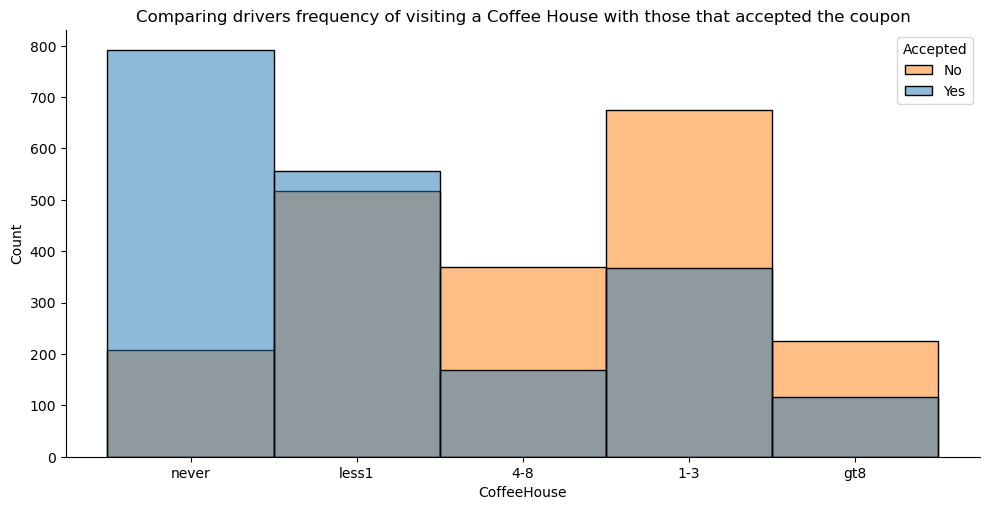

In [939]:
sns.displot(data=coffee_df, x='CoffeeHouse', hue='Accepted', height=5, aspect=2, legend=False)
plt.title("Comparing drivers frequency of visiting a Coffee House with those that accepted the coupon")
plt.legend(title='Accepted', labels=['No', 'Yes'])

#### There is a strong correlation with rare coffee house visitors and 10am.

In [911]:
px.density_heatmap(coffee_df[coffee_df['Accepted']==True], x="CoffeeHouse", y="time", marginal_x="histogram", marginal_y="histogram")

#### Based on the previous heatmap, I'm separating the morning with rare visits.

In [822]:
coffee_df['Coffee_Morn_3less'] = np.where((coffee_df['time'].str.contains('7AM|10AM')) & (coffee_df['CoffeeHouse'].str.contains('less1|1-3')), True, False)
coffee_df['Coffee_Morn_3less'].value_counts()
coffee_df[coffee_df['Coffee_Morn_3less']==True]['Accepted'].mean() #61
coffee_df[coffee_df['Coffee_Morn_3less']==False]['Accepted'].mean() #47

0.46561368871339254

In [949]:
Coffee_Morn_3less_hist = px.histogram(coffee_df, x='Accepted', color='Coffee_Morn_3less', histfunc='count', histnorm='percent', barmode='group',
                 labels={
                     "Coffee_Morn_3less": "",
                     "Accepted": "Accepted Coupon"
                 },
                title="Coupon acceptance rates among both drivers that frequent coffee houses 3 or less <br>times and accepted the coupon in the morning compared to those that did not")
Coffee_Morn_3less_hist.update_layout(title_x=0.5,
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['', '']
    )
)

#### Being that morning appears to have a higher count, I am interested if the weather has any correlation.

In [913]:
px.density_heatmap(coffee_df[coffee_df['Accepted']==True], x="CoffeeHouse", y="temperature", marginal_x="histogram", marginal_y="histogram")

#### High temperatures are definitely a factor in coupon acceptance. I'm curious if Students have higher temperatures based on an assumption that they are off in the summer months.

In [834]:
coffee_df['Coffee_Morn_3less_student'] = np.where((coffee_df['time'].str.contains('7AM|10AM')) & (coffee_df['CoffeeHouse'].str.contains('less1|1-3') & (coffee_df['occupation'].str.contains('Student'))), True, False)
coffee_df['Coffee_Morn_3less_student'].value_counts()
coffee_df[coffee_df['Coffee_Morn_3less_student']==True]['Accepted'].mean() #69
coffee_df[coffee_df['Coffee_Morn_3less_student']==False]['Accepted'].mean() #49

0.49355670103092786

In [951]:
Coffee_Morn_3less_Student_hist = px.histogram(coffee_df, x='Accepted', color='Coffee_Morn_3less_student', histfunc='count', histnorm='percent', barmode='group',
                 labels={
                     "Coffee_Morn_3less_student": "",
                     "Accepted": "Accepted Coupon"
                 },
                title="Coupon acceptance rates among both drivers that are students, frequent coffee houses 3 or less <br>times and accepted the coupon in the morning compared to those that did not")
Coffee_Morn_3less_Student_hist.update_layout(title_x=0.5,
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['', '']
    )
)

#### Segregating Students that accepted Coffee House coupons.

In [843]:
coffee_df['Student_Accepted'] = np.where((coffee_df['Accepted']==True) & (coffee_df['occupation'].str.contains('Student')), True, False)
coffee_df['Student_Accepted'].value_counts()
coffee_df[coffee_df['Student_Accepted']==True]['Accepted'].mean() #69
coffee_df[coffee_df['Student_Accepted']==False]['Accepted'].mean() #49

C:\Users\danie\AppData\Local\Temp\ipykernel_35108\3939421515.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



False    3684
True      312
Name: Student_Accepted, dtype: int64

In [890]:
px.density_heatmap(coffee_df[coffee_df['Student_Accepted']==True], x="CoffeeHouse", y="temperature", marginal_x="histogram", marginal_y="histogram")

In [952]:
px.density_heatmap(coffee_df[coffee_df['Student_Accepted']==False], x="CoffeeHouse", y="temperature", marginal_x="histogram", marginal_y="histogram")

In [953]:
px.density_heatmap(coffee_df[coffee_df['Student_Accepted']==True], x="CoffeeHouse", y="weather", marginal_x="histogram", marginal_y="histogram")

#### Creating dedicated column for Students in the warm morning that rarely visit coffee houses. 

In [901]:
coffee_df['Coffee_Morn_3less_student_warm'] = np.where((coffee_df['time'].str.contains('7AM|10AM')) & (coffee_df['CoffeeHouse'].str.contains('less1|1-3') & (coffee_df['occupation'].str.contains('Student')) & (coffee_df['temperature'] == 80)), True, False)
coffee_df['Coffee_Morn_3less_student_warm'].value_counts()
coffee_df[coffee_df['Coffee_Morn_3less_student_warm']==True]['Accepted'].mean() #68
coffee_df[coffee_df['Coffee_Morn_3less_student_warm']==False]['Accepted'].mean() #50

0.4961832061068702

0
1


[Text(0.5, 0, 'Condition: Morning time / Student / Warm weather'),
 Text(0, 0.5, 'Percentage Accepted'),
 [Text(0, 0, 'Condition Not Met'), Text(1, 0, 'Condition Met')],
 Text(0.5, 1.0, '')]

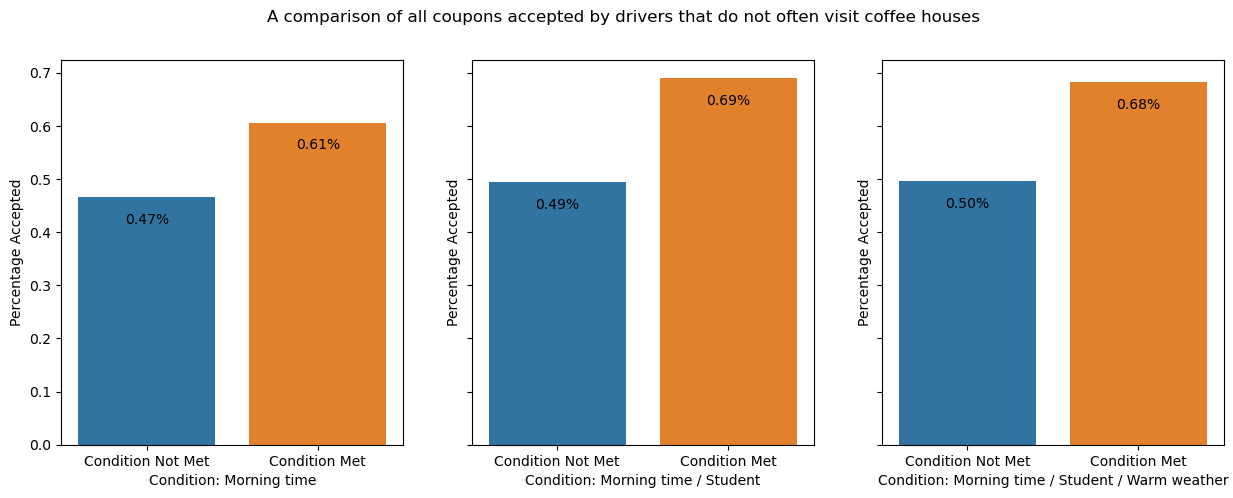

In [954]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('A comparison of all coupons accepted by drivers that do not often visit coffee houses')

# Coffee_Morn_3less BarChart
Coffee_Morn_3less_bar = sns.barplot(coffee_df, ax=axes[0], x='Coffee_Morn_3less', y='Accepted', errorbar=None)
percentageA = [coffee_df[coffee_df['Coffee_Morn_3less']==False]['Accepted'].mean(), coffee_df[coffee_df['Coffee_Morn_3less']==True]['Accepted'].mean()]
patchesA = Coffee_Morn_3less_bar.patches
for i in range(len(patchesA)):
   print(i) 
   x = patchesA[i].get_x() + patchesA[i].get_width()/2
   y = patchesA[i].get_height()-.05
   Coffee_Morn_3less_bar.annotate('{:.2f}%'.format(percentageA[i]), (x, y), ha='center')
axes[0].set(xlabel='Condition: Morning time',
       ylabel='Percentage Accepted',
       xticklabels=['Condition Not Met','Condition Met'],
       title='')

# Coffee_Morn_3less_student BarChart
Coffee_Morn_3less_student_bar = sns.barplot(coffee_df, ax=axes[1], x='Coffee_Morn_3less_student', y='Accepted', errorbar=None)
percentageB = [coffee_df[coffee_df['Coffee_Morn_3less_student']==False]['Accepted'].mean(), coffee_df[coffee_df['Coffee_Morn_3less_student']==True]['Accepted'].mean()]
patchesB = Coffee_Morn_3less_student_bar.patches
for n in range(len(patchesB)):
   x = patchesB[n].get_x() + patchesB[n].get_width()/2
   y = patchesB[n].get_height()-.05
   Coffee_Morn_3less_student_bar.annotate('{:.2f}%'.format(percentageB[n]), (x, y), ha='center')
axes[1].set(xlabel='Condition: Morning time / Student',
       ylabel='Percentage Accepted',
       xticklabels=['Condition Not Met','Condition Met'],
       title='')

# Coffee_Morn_3less_student_warm BarChart
Coffee_Morn_3less_student_warm_bar = sns.barplot(coffee_df, ax=axes[2], x='Coffee_Morn_3less_student_warm', y='Accepted', errorbar=None)
percentageC = [coffee_df[coffee_df['Coffee_Morn_3less_student_warm']==False]['Accepted'].mean(), coffee_df[coffee_df['Coffee_Morn_3less_student_warm']==True]['Accepted'].mean()]
patchesC = Coffee_Morn_3less_student_warm_bar.patches
for k in range(len(patchesC)):
   x = patchesC[k].get_x() + patchesC[k].get_width()/2
   y = patchesC[k].get_height()-.05
   Coffee_Morn_3less_student_warm_bar.annotate('{:.2f}%'.format(percentageC[k]), (x, y), ha='center')
axes[2].set(xlabel='Condition: Morning time / Student / Warm weather',
       ylabel='Percentage Accepted',
       xticklabels=['Condition Not Met','Condition Met'],
       title='')

# Though not testable with the current dataset, my hyposthesis is the higher coupon acceptance and its correlation to the higher temperature, could correlate to more time available for students during the summer months or perhaps an interest in iced coffee as opposed to hot coffee.